In [3057]:
import pandas as pd
import numpy as np
import datetime

In [3058]:
df = pd.read_csv('train.csv')

In [3059]:
import seaborn as sn
import matplotlib.pyplot as plt

In [3060]:
import math
def deg_to_rad(dr):
    return (dr*math.pi)/180

df['pick_lat'] = deg_to_rad(df['pick_lat'])
df['pick_lon'] = deg_to_rad(df['pick_lon'])
df['drop_lat'] = deg_to_rad(df['drop_lat'])
df['drop_lon'] = deg_to_rad(df['drop_lon'])

In [3061]:
dlon = df['drop_lon'] - df['pick_lon']
dlat = df['drop_lat'] - df['pick_lat']

In [3062]:
df['dist'] = np.sin(dlat/2)**2 + np.cos(df['pick_lat'])*np.cos(df['drop_lat'])*np.sin(dlon/2)**2

In [3063]:
df['dist'] = 2*np.arctan2(df['dist']**0.5,(1-df['dist'])**0.5)

In [3064]:
R = 6373.0
df['dist'] = R*df['dist']

In [3065]:
df['fare'].count()
df['label'] = df['label'].map({'correct': 1, 'incorrect': 0})

In [3066]:
df = df.dropna(how='any')           # assign back
df.dropna(how='any', inplace=True)

In [3067]:
indexNames = df[(df['fare'] <= 20) | (df['fare'] >= 500)].index
 
# Delete these row indexes from dataFrame
df.drop(indexNames ,inplace=True)

In [3068]:
df

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label,dist
0,189123628,10.5,834.0,56.0,0.0000,64.0,11/1/2019 0:20,11/1/2019 0:34,0.119774,1.394506,0.120485,1.394139,270.32,1,5.094369
1,189125358,10.5,791.0,47.0,0.0000,134.0,11/1/2019 0:56,11/1/2019 1:09,0.120181,1.394490,0.120667,1.394384,197.85,1,3.169052
2,189125719,10.5,1087.0,80.0,0.0000,61.0,11/1/2019 1:08,11/1/2019 1:26,0.120574,1.393909,0.121068,1.394773,301.64,1,6.307375
3,189127273,10.5,598.0,271.0,15.6638,68.0,11/1/2019 2:27,11/1/2019 2:37,0.120876,1.394335,0.120907,1.394467,82.30,1,0.862217
6,189132829,10.5,1246.0,487.0,0.0000,133.0,11/1/2019 6:29,11/1/2019 6:49,0.119445,1.394607,0.119567,1.393862,266.62,1,4.779123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17170,213802222,10.5,400.0,95.0,0.0000,113.0,1/31/2020 21:59,1/31/2020 22:06,0.119966,1.394167,0.119847,1.394113,81.23,1,0.830228
17171,213803193,10.5,838.0,93.0,5.4219,451.0,1/31/2020 22:07,1/31/2020 22:21,0.127247,1.407376,0.127215,1.407708,198.26,1,2.106037
17173,213813930,10.5,263.0,9.0,0.0000,110.0,1/31/2020 23:21,1/31/2020 23:25,0.123780,1.394518,0.123942,1.394548,76.20,1,1.045847
17174,213815405,10.5,858.0,115.0,0.0000,317.0,1/31/2020 23:39,1/31/2020 23:53,0.121220,1.394113,0.121051,1.394536,133.31,1,2.879981


/home/damitha/Documents/ML_project/data_preprocessing-20200428T103700Z-001/data_preprocessing/venv/lib/python3.6/site-packages/seaborn/regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Equatorial coordinates')

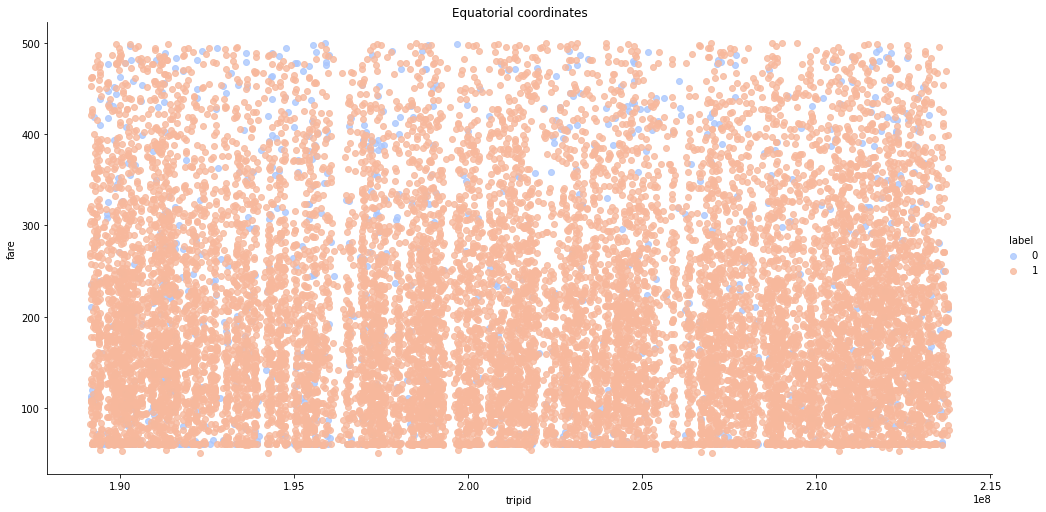

In [3069]:
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

sns.lmplot(x="tripid", y="fare", data=df, hue='label', fit_reg=False, palette='coolwarm', size=7, aspect=2)
plt.title('Equatorial coordinates')

In [3070]:
df.describe()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pick_lat,pick_lon,drop_lat,drop_lon,fare,label,dist
count,1.454100e+04,14541.000000,14541.000000,14541.000000,14541.000000,14541.000000,14541.000000,14541.000000,14541.000000,14541.000000,14541.000000,14541.000000,14541.000000
mean,2.014898e+08,12.697717,1046.616189,230.940582,9.799547,107.036724,0.121602,1.396317,0.121662,1.396280,208.389123,0.934117,3.835754
std,7.452143e+06,12.023182,768.641926,378.325500,21.530272,460.561077,0.003789,0.004341,0.007063,0.006639,114.203676,0.248085,46.581820
min,1.891236e+08,5.000000,22.000000,0.000000,0.000000,0.000000,0.103631,1.393106,0.103705,0.790769,50.480000,0.000000,0.000000
25%,1.947666e+08,10.500000,496.000000,29.000000,0.000000,24.000000,0.119814,1.393998,0.119829,1.393986,114.860000,1.000000,1.381589
50%,2.014250e+08,10.500000,874.000000,100.000000,0.000000,69.000000,0.120658,1.394485,0.120690,1.394483,183.650000,1.000000,2.831885
75%,2.083729e+08,10.500000,1428.000000,276.000000,10.461800,138.000000,0.123044,1.395529,0.123109,1.395553,281.150000,1.000000,5.024180
max,2.138173e+08,221.000000,14256.000000,6249.000000,364.316700,51288.000000,0.140517,1.413884,0.840062,1.413886,499.910000,1.000000,5611.282395


In [3071]:
def dummy_df(df, todummy_list):
    
    for x in todummy_list:
        dummies = pd.get_dummies(df[x], prefix = x, dummy_na=False)
        df = df.drop(x,1)
        df = pd.concat((df, dummies), axis=1)
        
    return df

In [3072]:
df = df.drop(['tripid','meter_waiting_till_pickup','pickup_time','drop_time','pick_lat','pick_lon','drop_lat','drop_lon'], axis = 1) 

In [3073]:
y = df['label']
df = df.drop(['label'], axis = 1)

In [3074]:
X = df

In [3075]:
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [3076]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [3077]:
from xgboost import XGBClassifier

In [3078]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

In [3079]:
xgb = XGBClassifier(n_estimators=290)
xgb.fit(X_train, y_train)
preds = xgb.predict(X_test)
preds_t = xgb.predict(X_train)
acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100
print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))
print("F1 score = {}".format(f1_score(y_test, preds)))

XGBoost's prediction accuracy is: 96.17
F1 score = 0.9797796343382977


In [3080]:
print("Training F1 Micro Average: ", f1_score(y_train,preds_t))
print("Test F1 Micro Average: ", f1_score(y_test, preds))

Training F1 Micro Average:  1.0
Test F1 Micro Average:  0.9797796343382977


In [3081]:
df_test = pd.read_csv('test.csv')

In [3082]:
df_test['pick_lat'] = deg_to_rad(df_test['pick_lat'])
df_test['pick_lon'] = deg_to_rad(df_test['pick_lon'])
df_test['drop_lat'] = deg_to_rad(df_test['drop_lat'])
df_test['drop_lon'] = deg_to_rad(df_test['drop_lon'])

In [3083]:
dlon = df_test['drop_lon'] - df_test['pick_lon']
dlat = df_test['drop_lat'] - df_test['pick_lat']

In [3084]:
df_test['dist'] = np.sin(dlat/2)**2 + np.cos(df_test['pick_lat'])*np.cos(df_test['drop_lat'])*np.sin(dlon/2)**2

In [3085]:
df_test['dist'] = 2*np.arctan2(df_test['dist']**0.5,(1-df_test['dist'])**0.5)

In [3086]:
R = 6373.0
df_test['dist'] = R*df_test['dist']

In [3087]:
df_test['pickup_time'] = [int(i.split()[1].split(':')[0]) for i in df_test['pickup_time']]

In [3088]:
df_test =df_test.drop(['meter_waiting_till_pickup','pickup_time','drop_time','pick_lat','pick_lon','drop_lat','drop_lon'], axis = 1) 

In [3089]:
df_new = df_test

In [3090]:
df_test = df_test.drop(['tripid'], axis = 1) 

In [3091]:
X_2 = df_test

In [3092]:
y_ran_pred=xgb.predict(X_2)

In [3093]:
df_new['prediction'] = y_ran_pred

In [3094]:
df_new = df_new.drop(['additional_fare','duration','meter_waiting','meter_waiting_fare','fare','dist'], axis = 1) 

In [3095]:
df_new.to_csv("prediction_results_ran.csv",index=False)

In [3096]:
df_new

,tripid,prediction
0,213284604,1
1,213286352,1
2,213293973,1
3,213294622,1
4,213298687,1
...,...,...
8571,222856243,1
8572,222857785,1
8573,222858416,1
8574,222858691,1
